In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
path="/home/deepak/python /ipython-notebooks/data/ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()  

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()  


,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


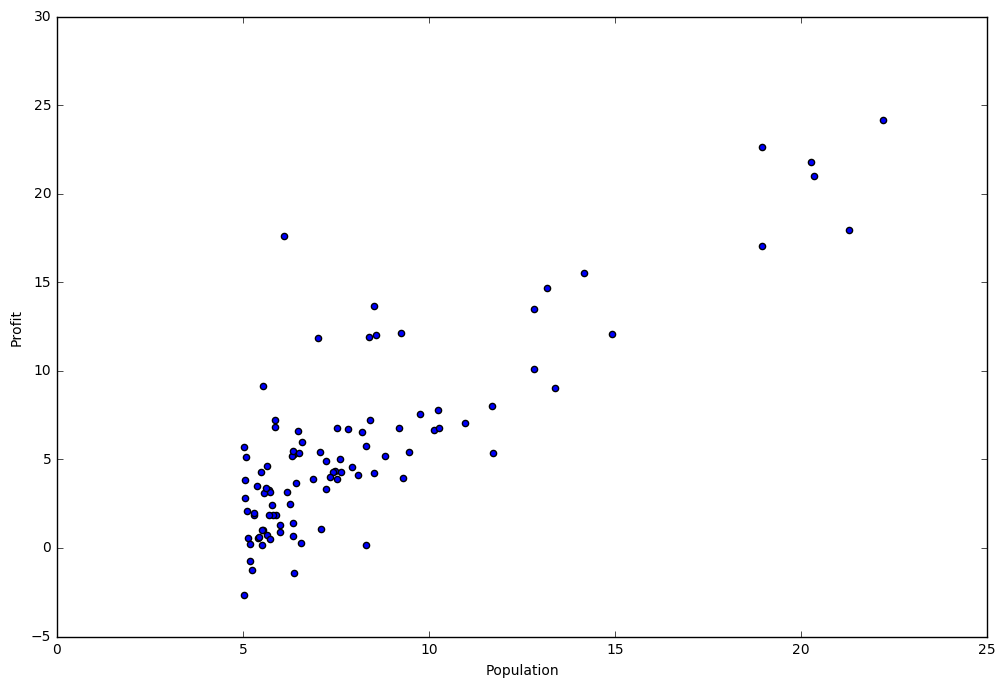

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))  


In [5]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [6]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]  

In [7]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))

In [8]:
X.shape, theta.shape, y.shape  

((97, 2), (1, 2), (97, 1))

In [9]:
computeCost(X, y, theta)  

32.072733877455676

In [10]:
int(theta.ravel().shape[1])

2

In [13]:
jdot = np.matrix(np.zeros(theta.shape))
for i in range(iters):
    
    jdot=((X * theta.T) - y).T * X
    theta=theta-  (alpha/len(X))*jdot
    cost[i]=computeCost(X,y,theta)
    

NameError: name 'iters' is not defined

In [14]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters): 
        #calculate deriviative of J
        term = ((X * theta.T) - y).T * X
        #Update alpha
        theta = theta - ((alpha / len(X)) * term)
        #Cost for i-th iteration
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [15]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g  

matrix([[-3.24140214,  1.1272942 ]])

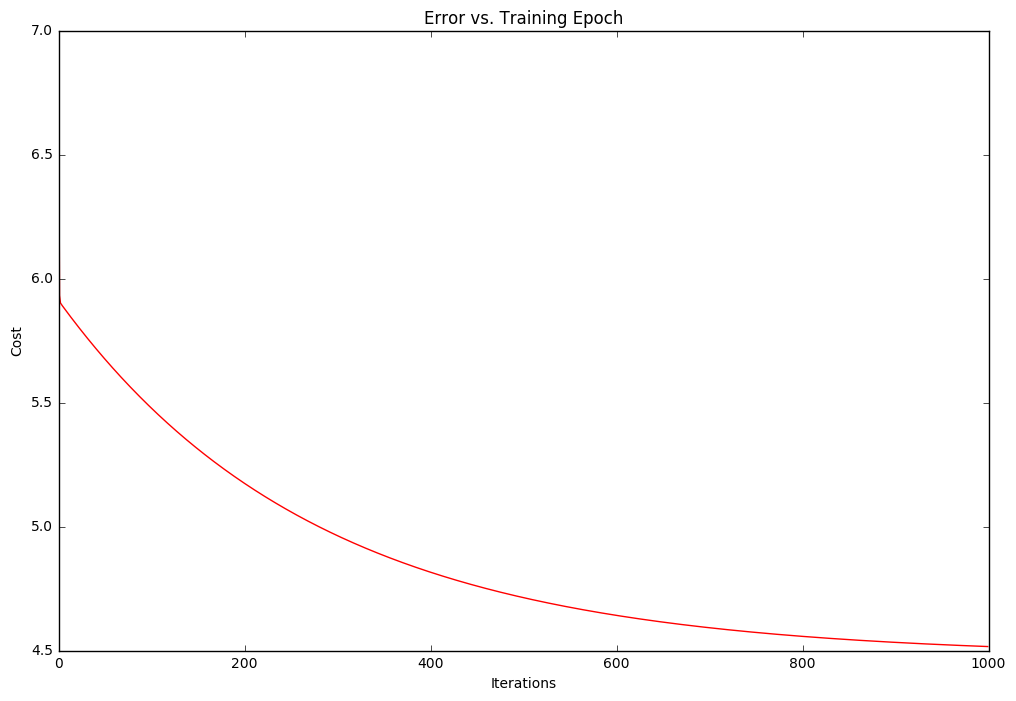

In [16]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

### Multivariate Linear Regression

In [18]:
path="/home/deepak/python /ipython-notebooks/data/ex1data2.txt"
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data2.head()  

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
data2 = (data2 - data2.mean()) / data2.std()  
data2.head()  

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [39]:
def gradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters= int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    
    # Do gradient descent iters times
    for i in range(iters):
        
        # use error in calculating j dot
        error=(X.theta.T)-y
        
        # iterate over parameters update temp one by one 
        for j in range(parameters):
            
            #jdot = diff(cost)
            jdot= np.multiply(error,X[:j])
            
            # update parameters
            temp[0,j]=theta[0,j]-((alpha/len(X)*np.sum(jdot)))
       
        # update theta
        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [24]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]  
X2 = data2.iloc[:,0:cols-1]  
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  
theta2 = np.matrix(np.array([0,0,0]))  

In [41]:
# perform linear regression on the data set
theta2 = np.matrix(np.array([0,0,0]))  
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)  

AttributeError: 'matrix' object has no attribute 'theta'

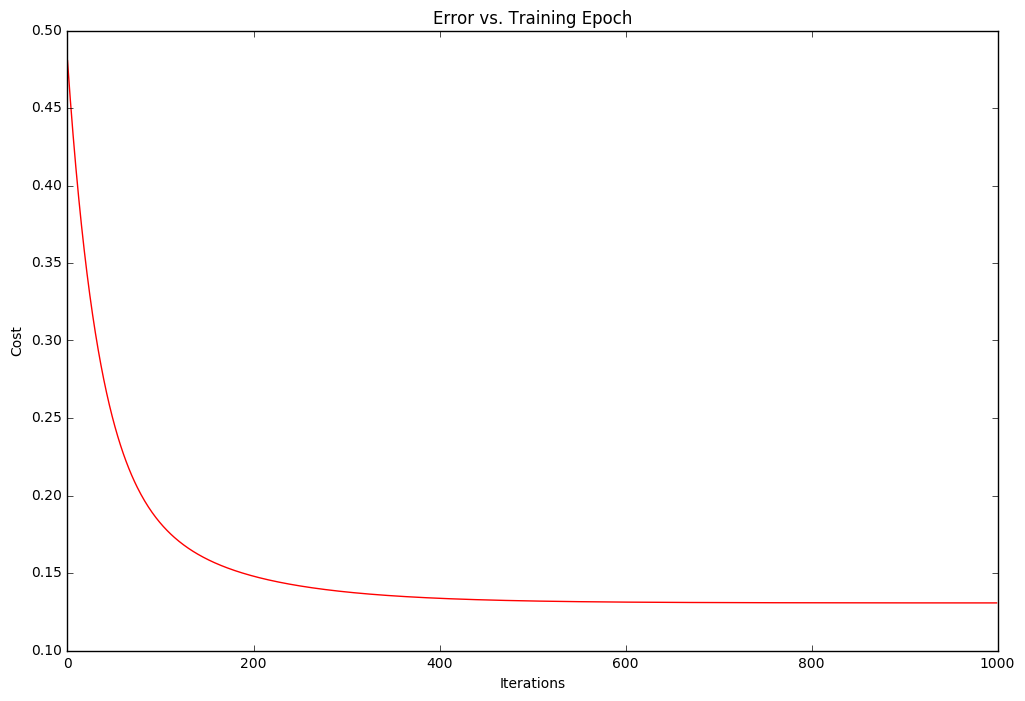

In [42]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [43]:
### Using Scikit Learn

In [44]:
from sklearn import linear_model  
model = linear_model.LinearRegression()  
model.fit(X, y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

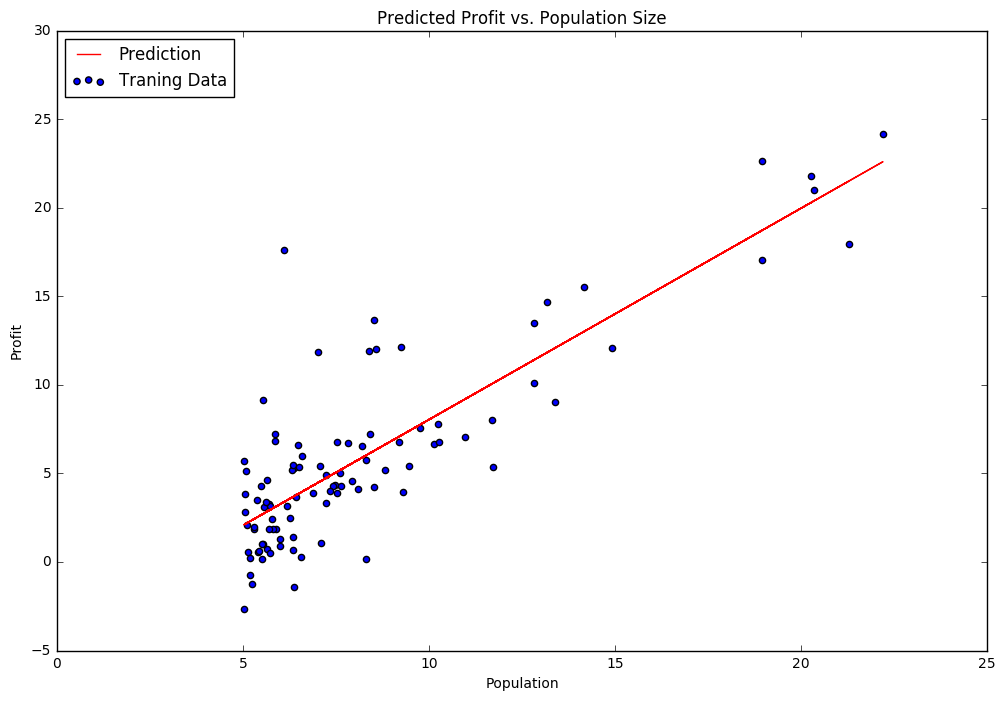

In [45]:
x = np.array(X[:, 1].A1)  
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  